In [2]:
import ants
import pandas

In [6]:
firstfile = '/Users/cxl037/PycharmProjects/pythonProject1/Example_Data/Nifti_Data/Pinzer_Kaye_L.nii'
secondfile = '/Users/cxl037/PycharmProjects/pythonProject1/Example_Data/Nifti_Data/T1Cube.nii'
thirdfile = '/Users/cxl037/PycharmProjects/pythonProject1/Example_Data/Nifti_Data/T2Flair.nii'
fixed=ants.image_read(firstfile)
moving=ants.image_read(secondfile)
moving2=ants.image_read(thirdfile)

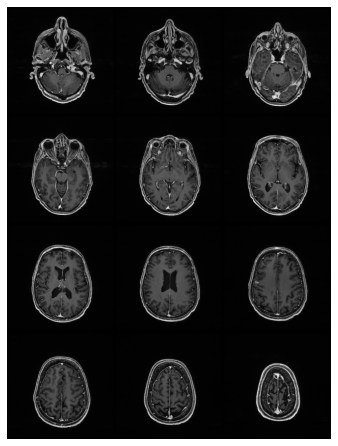

In [7]:
ants.plot(fixed, axis = 2)

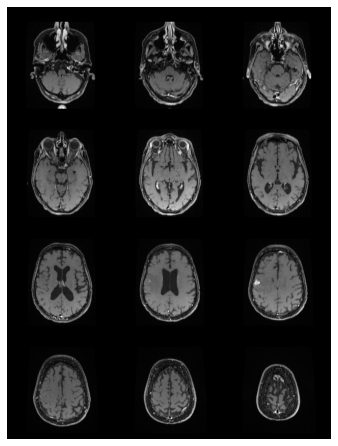

In [8]:
ants.plot(moving, axis = 2)

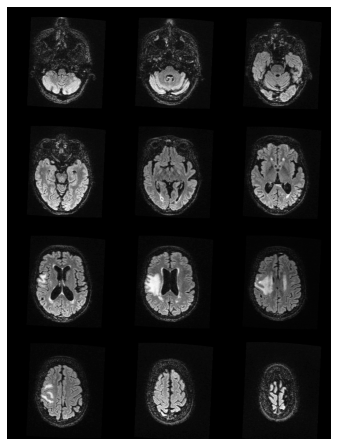

In [11]:
ants.plot(moving2, axis = 2)

In [5]:
df = pandas.read_excel('/Users/cxl037/PycharmProjects/pythonProject1/CompleteRegistration.xlsx', index_col = 0)
print(df)

          MRI_Date              "+c Ax T1 Stealth bravo"  \
MRN                                                        
392811  2019-02-15         "10 - +c Ax T1 Stealth Bravo"   
468333  2019-04-16          "11 - +Ax T1BRAVOstealth 3D"   
735764  2021-03-05        13 - POST AX 3D T1 BRAVO 1.2MM   
894326  2018-05-09            10 - +c AxT1 Stealth BRAVO   
1108503 2020-12-14           10 - +c Ax T1 Stealth bravo   
1108503 2021-09-27           11 - +c Ax T1 Stealth bravo   
1183497 2020-01-02            8 - +c Ax T1 Stealth bravo   
1244948 2020-09-15           10 - +c Ax T1 Stealth bravo   
1425124 2019-02-12           10 - +C Ax T1 BRAVO Stealth   
1455583 2018-01-09            9 - +C Ax T1 BRAVO Stealth   
1511647 2021-07-30           12 - +c Ax T1 Stealth Bravo   
1577489 2021-06-22    11 - +c Ax T1 Stealth bravo repeat   
1649749 2016-12-30            9 - +c Ax T1 Stealth BRAVO   
1649749 2018-07-16            9 - +c Ax T1 Stealth Bravo   
1759492 2017-04-04              10 - POS

In [22]:
df = pandas.read_excel('/Users/cxl037/PycharmProjects/pythonProject1/CompleteRegistration.xlsx', index_col = 0)
allRegfiles = {}

for _, row in df.iterrows():
    allRegfiles[row.name] = []
    allRegfiles[row.name].append(row['"+c Ax T1 Stealth bravo"'].replace('"', ''))
    allRegfiles[row.name].append(row['"+c COR T1 CUBE VASC"'].replace('"', ''))
    allRegfiles[row.name].append(row['"+c Sag CUBE T2 FLAIR"'].replace('"', ''))

In [26]:
test = 't'
if test:
    print("Not empty")

Not empty


In [23]:
for file in sessionfiles:
    regfiles = patientfiles[subject]
    T1StealthBravo = ''
    T1CubeVasc = ''
    T2CubeFlair = ''
    # go through all the files in the session and if the file is a registration file, then initialize it correspondingly
    if regfiles[0] in file:
        T1StealthBravo = file
    if regfiles[1] in file:
        T1CubeVasc = file
    if regfiles[2] in file:
        T2CubeFlair = file
    # all of the files were found and are not empty
    if T1StealthBravo and T1CubeVasc and T2CubeFlair:
        # read files into antspy
        fixed = ants.image_read(T1StealthBravo)
        moving = ants.image_read(T1CubeVasc)
        moving2 = ants.image_read(T2CubeFlair)
        
        # register T1CubeVasc to T1StealthBravo
        regT1CubeVasc = ants.registration(fixed=fixed, moving=moving, type_of_transform='Similarity')
        
        # register T2CubeFlair to T1StealthBravo
        regT2CubeFlair = ants.registration(fixed=fixed, moving=moving2, type_of_transform='Similarity')
        
        # output path to write registered files to
        output_path = os.path.join(nifti_path, 'T1CubeVasc.nii')
        output_path2 = os.path.join(nifti_path, 'T2CubeFlair.nii')
        
        # write the registered files with forward transform to output path
        ants.image_write(regT1CubeVasc['warpedmovout'], output_path)
        ants.image_write(regT2CubeFlair['warpedmovout'], output_path2)
        

{392811: ['10 - +c Ax T1 Stealth Bravo', '11 - +c COR T1 CUBE VASC', '9 - +c Sag T2 FLAIR Cube'], 468333: ['11 - +Ax T1BRAVOstealth 3D', '12 - +c Cor T1 VASC', '9 - +Sag CUBE fat T2FLAIR'], 735764: ['13 - POST AX 3D T1 BRAVO 1.2MM', '11 - POST COR CUBE T1 FS', '12 - POST  SAG T2 FS CUBE FLAIR'], 894326: ['10 - +c AxT1 Stealth BRAVO', '11 - +c COR T1 CUBE VASC', '9 - +c T2 CUBE FLAIR Sag'], 1108503: ['11 - +c Ax T1 Stealth bravo', '12 - +c COR CUBE T1 VASC', '10 - +c Sag CUBE T2 FLAIR'], 1183497: ['8 - +c Ax T1 Stealth bravo', '9 - +c COR CUBE T1 VASC', '7 - +c Sag CUBE T2 FLAIR'], 1244948: ['10 - +c Ax T1 Stealth bravo', '11 - +c COR CUBE T1 VASC', '9 - +c Sag CUBE T2 FLAIR'], 1425124: ['10 - +C Ax T1 BRAVO Stealth', '11 - +C Cor T1 Cube', '9 - +C Sag T2 CUBE FLAIR'], 1455583: ['9 - +C Ax T1 BRAVO Stealth', '10 - +C Cor T1 Cube VASC', '8 - +C Sag T2 FLAIR'], 1511647: ['12 - +c Ax T1 Stealth Bravo', '11 - +c COR T1 CUBE VASC', '9 - +c Sag T2 FLAIR Cube'], 1577489: ['11 - +c Ax T1 Stealt

In [ ]:
ants.plot(fixed, axis = 2)
ants.plot(moving, axis = 0)
ants.plot(moving2, axis = 1)

In [6]:
# registering T2 Flair Sag to T1 Ax Stealth Bravo
reg12 = ants.registration(fixed=fixed, moving=moving, type_of_transform='Similarity')


# # registering T1 Cube Cor to the registered image
# reg13 = ants.registration(fixed=fixed, moving=moving2, type_of_transform='Similarity')


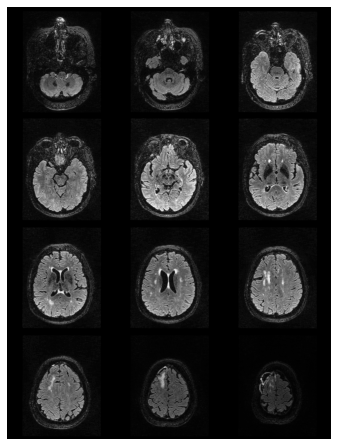

In [7]:
ants.plot(reg12['warpedmovout'], axis = 2)

In [ ]:
output_path = '/Users/cxl037/PycharmProjects/pythonProject1/Example_Data/Nifti_Data/T2Flair.nii'
output_path2 = '/Users/cxl037/PycharmProjects/pythonProject1/Example_Data/Nifti_Data/T1Cube.nii'
ants.image_write(reg12['warpedmovout'], output_path)
ants.image_write(reg13['warpedmovout'], output_path2)


In [ ]:
ants.plot(reg13['warpedmovout'], axis = 2)